In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
center_a_coordinate = (400, 415)
center_d_coordinate = (511, 511)

# actual pixel position measured from product image
pixel_xa_plus = np.array([536, 568, 605, 623, 659, 673, 701, 716, 738])
pixel_xa_minus = np.array([266, 237, 192, 178, 143, 125, 94, 84, 61])
pixel_ya_plus = np.array([278, 244, 210, 184, 156, 136, 112, 96, 74])
pixel_ya_minus = np.array([550, 588, 622, 647, 674, 691, 717, 734, 755])
# pixel position measure from design image
pixel_d_minus = np.array([318, 260, 213, 172, 135, 102, 71, 43, 16])

ratio_micron_per_pixel_x = 168.875 * 0.4 /(pixel_xa_minus[1] - pixel_xa_minus[2])
ratio_micron_per_pixel_y = 2531.692 * 0.4 /(755 - 74)
print(ratio_micron_per_pixel_x)
print(ratio_micron_per_pixel_y)
ratio_micron_per_pixel = ratio_micron_per_pixel_y
# print(ratio_micron_per_pixel)

rxa_minus = (center_a_coordinate[0] - pixel_xa_minus)*ratio_micron_per_pixel
rxa_plus = (pixel_xa_plus - center_a_coordinate[0])*ratio_micron_per_pixel
rya_minus = (pixel_ya_minus - center_a_coordinate[1])*ratio_micron_per_pixel
rya_plus = (center_a_coordinate[1] - pixel_ya_plus)*ratio_micron_per_pixel
rd = center_d_coordinate[0] - pixel_d_minus
print('/////////////////////////')
print(f'designed markers radial location: {rd} μm')
print(f'marker radial position difference (actual - designed)')
print(f'-x axes: {np.round(rxa_minus-rd, 2)} μm')
print(f'+x axes: {np.round(rxa_plus-rd, 2)} μm')
print(f'-y axes: {np.round(rya_minus-rd, 2)} μm')
print(f'+y axes: {np.round(rya_plus-rd, 2)} μm')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1.501111111111111
1.48704375917768
/////////////////////////
designed markers radial location: [193 251 298 339 376 409 440 468 495] μm
marker radial position difference (actual - designed)
-x axes: [ 6.26 -8.61 11.31 -8.88  6.17 -0.06 15.04  1.91  9.11] μm
+x axes: [ 9.24 -1.18  6.84 -7.39  9.14 -3.04  7.6   1.91  7.62] μm
-y axes: [ 7.75  6.26  9.82  5.99  9.14  1.42  9.09  6.37 10.59] μm
+y axes: [10.72  3.28  6.84  4.51  9.14  5.89 10.57  6.37 12.08] μm


In [47]:
tmp_x = (rxa_minus-rd + rxa_plus-rd)/2
tmp_y = (rya_minus-rd + rya_plus-rd)/2
avg_x = (tmp_x[0] - tmp_x[1] + tmp_x[2] - tmp_x[3] + tmp_x[4] - tmp_x[5] + tmp_x[6] - tmp_x[7])/4
avg_y = (tmp_y[0] - tmp_y[1] + tmp_y[2] - tmp_y[3] + tmp_y[4] - tmp_y[5] + tmp_y[6] - tmp_y[7])/4

In [48]:
print(avg_x)
print(avg_y)

12.117929515418506
4.125069309838459


In [33]:
img_a_array = np.moveaxis(np.array(Image.open('./aperture/tmp/actual_measure.png')), 0, 1)
img_d_array = np.moveaxis(np.array(Image.open('./aperture/tmp/f49f33_angular8_measure2.bmp')), 0, 1)
print(img_a_array.shape)

(781, 769, 4)


In [29]:
print(img_a_array.min())

14


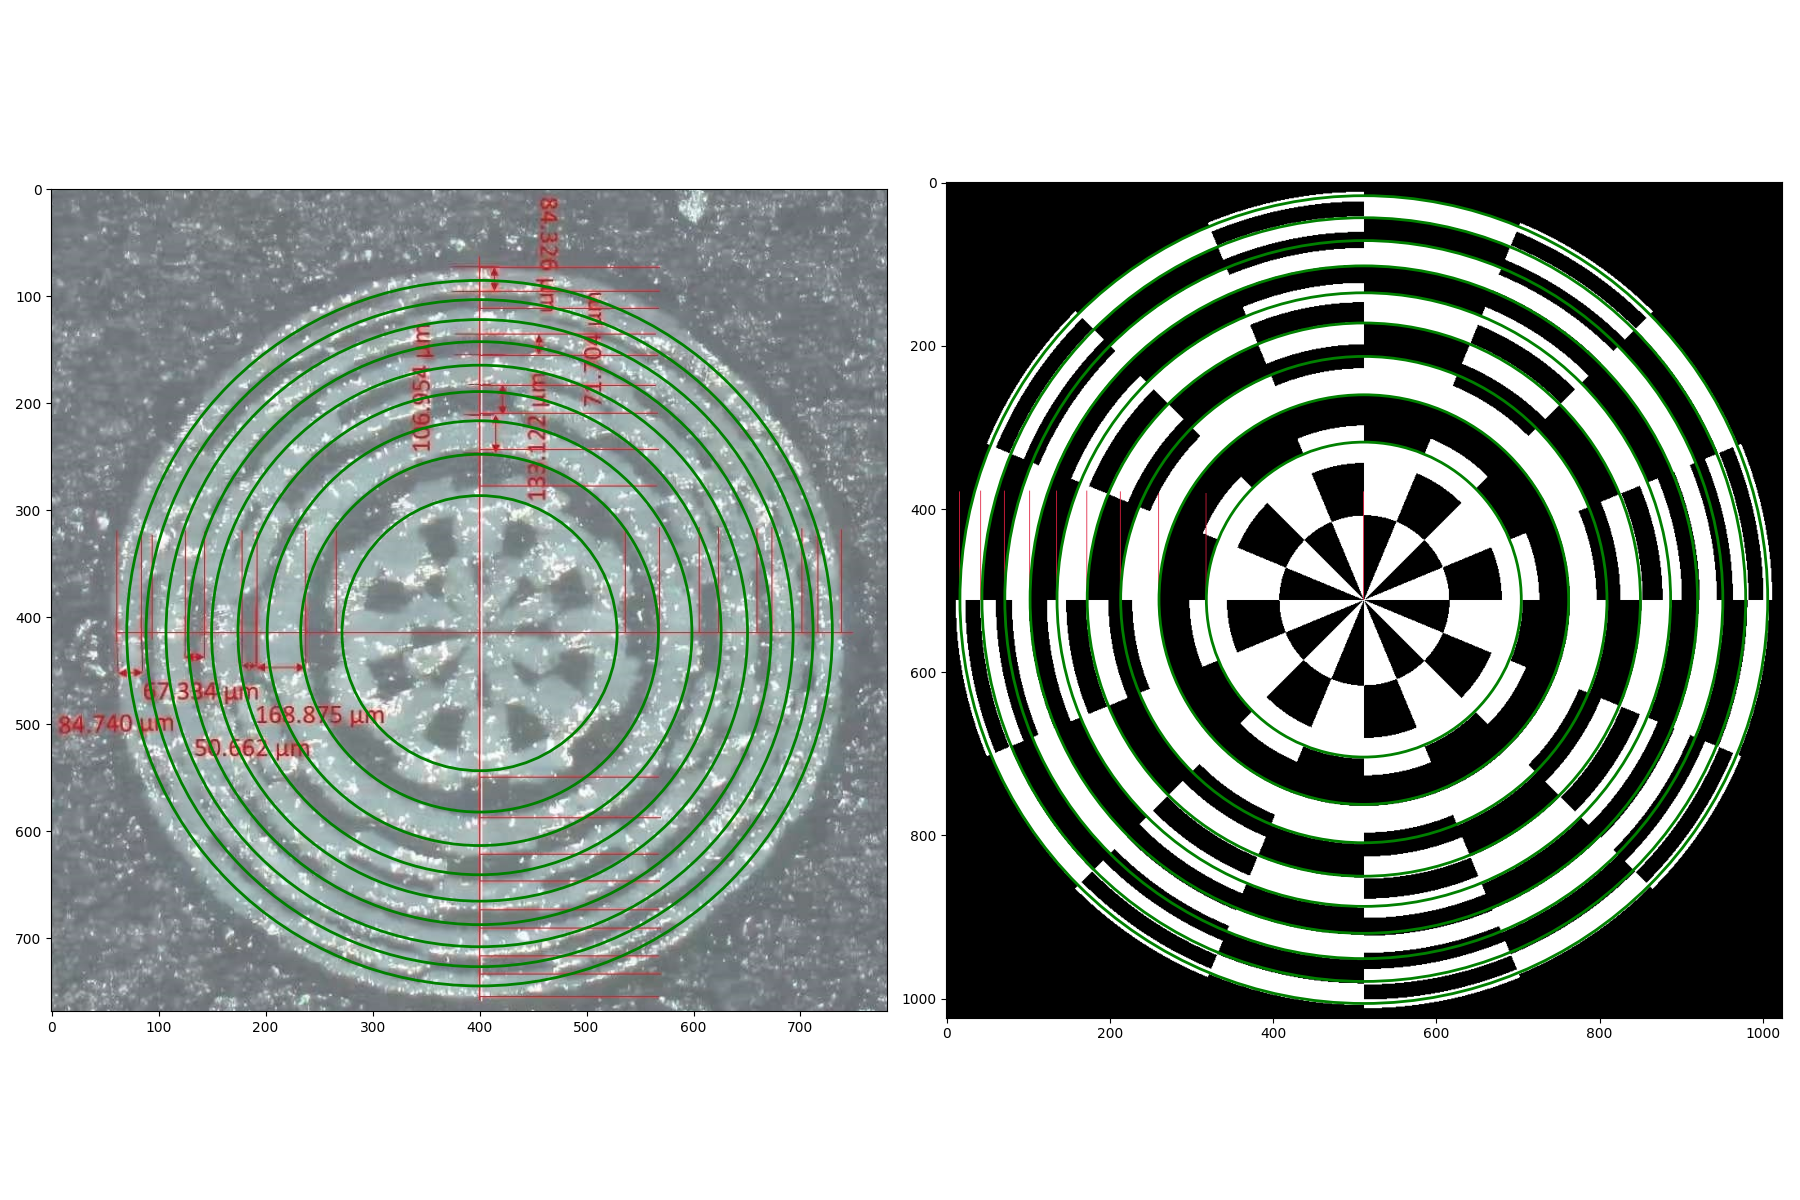

In [44]:
layout = [[0, 1]]
fig, ax = plt.subplot_mosaic(layout, figsize=(18, 12))
ax[0].imshow(np.moveaxis(img_a_array, 0, 1))
ax[1].imshow(np.moveaxis(img_d_array, 0, 1), cmap='grey')
for r in rd:
    circle = patches.Circle(center_a_coordinate, r/ratio_micron_per_pixel, edgecolor='green', facecolor='none', linewidth=2)
    ax[0].add_patch(circle)
    circle = patches.Circle(center_d_coordinate, r, edgecolor='green', facecolor='none', linewidth=2)
    ax[1].add_patch(circle)
fig.tight_layout()
plt.savefig(f'aperture/tmp/compare.png', dpi=300)
plt.show()

In [33]:
print(xa.sum())
print(ya.sum())
print(xyd.sum())

152.76174027469364
162.88592811908873
147


In [34]:
print(xa[:2].sum())
print(ya[:2].sum())
print(xyd[:2].sum())

90.22616991528909
98.72357924171396
88


In [26]:
1000 / (168.875 * 648/47)

0.42949438458937594

In [7]:
aperture = np.load('./aperture/f49f33_angular8.npy')

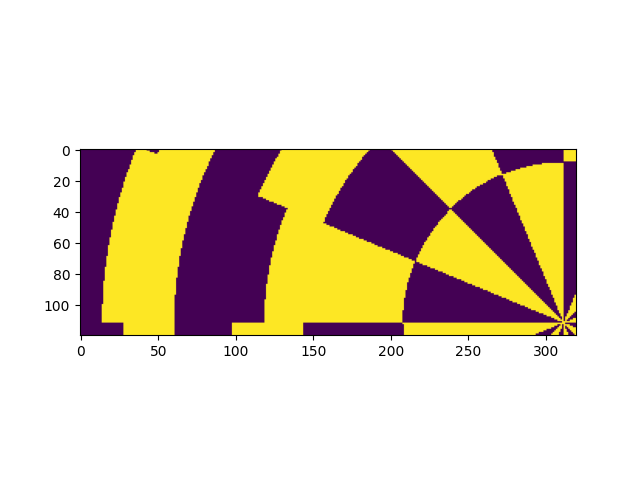

In [17]:
plt.imshow(aperture[400:520, 200:520])
plt.show()